# Notebook imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the CSV file
housing_data = pd.read_csv("HousingData.csv")

# View the first 5 rows
housing_data.head()
housing_data.describe()

#charts would show up even when we export our notebooks
%matplotlib inline

# Gather Data

## Data points and features

In [5]:
type(housing_data)

pandas.core.frame.DataFrame

In [6]:
housing_data.shape

(506, 14)

In [7]:
housing_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [8]:
housing_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Cleaning Data

In [9]:
pd.isnull(housing_data).any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

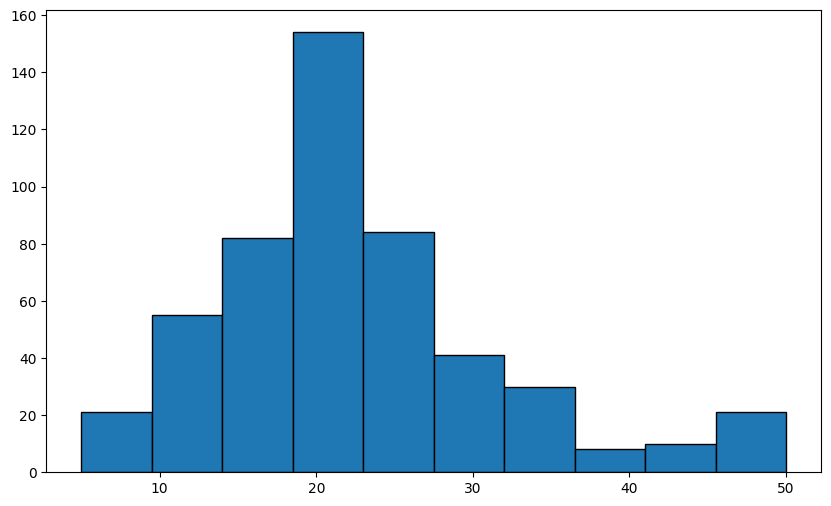

In [11]:
plt.figure(figsize = (10,6))
plt.hist(housing_data['MEDV'], ec='black')
plt.show()

## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{X,Y} \leq +1.0 $$

In [23]:
housing_data['MEDV'].corr(housing_data['RM'])
# price vs room size - correlation

0.6953599470715396

In [27]:
# Calculate the correlation between the property prices and the pupil teacher ratio
housing_data['MEDV'].corr(housing_data['PTRATIO'])
# since we have a negative correlation here, it means is that, the higher the cost of housing, lesser is the PT ratio
# which means high quality of education

-0.5077866855375618

In [28]:
# Correlating the whole data instead of doing one bye one
# Pearson Correlation Coeffecient
housing_data.corr()
# correlation of a variable against itself is always equal to one

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 -0.360532  0.051264 -0.380051  0.128069 -0.275303   
LSTAT    0.444943 -0.414193  0.590690 -0.047424  0.582641 -0.614339  0.602891   
MEDV    -0.391363  0.373136 -0.481772  0.181391 -0.427321  0.695360 -0.394656   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.374166  0.624765  0.580595  0.281110 -0.381411  0.444943 -0.391363  
ZN       0.656739 -0.310919 -0.312371 -0.414046  0.171303 -0.414193  0.373136  
INDUS   -0.711709  0.604533  0.731055  0.390954 -0.360532  0.590690 -0.481772  
CHAS    -0.093971  0.001468 -0.032304 -0.111304  0.051264 -0.047424  0.181391  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.582641 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.614339  0.695360  
AGE     -0.744844  0.458349  0.509114  0.269226 -0.275303  0.602891 -0.394656  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.493328  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.479541 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.536110 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.375966 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.369889  0.333461  
LSTAT   -0.493328  0.479541  0.536110  0.375966 -0.369889  1.000000 -0.735822  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.735822  1.000000

In [34]:
mask = np.zeros_like(housing_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
# removing the duplicates

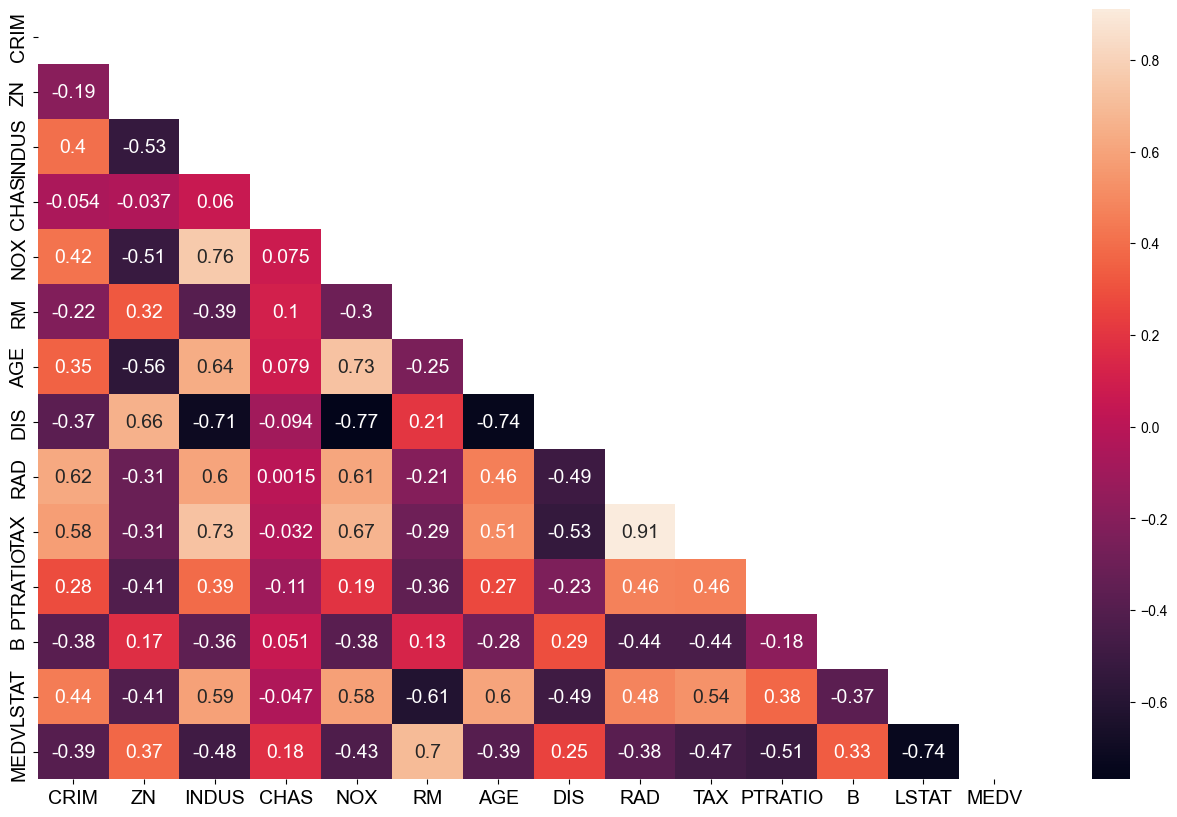

In [46]:
# Correlation Matrix
plt.figure(figsize = (16,10))
sns.heatmap(housing_data.corr(), mask = mask, annot = True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

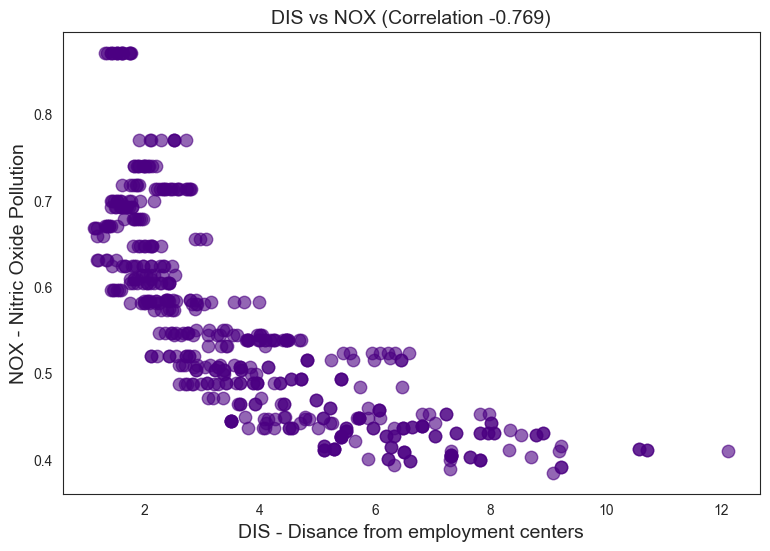

In [55]:
# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX
nox_dis_corr = round(housing_data['NOX'].corr(housing_data['DIS']),3)
plt.figure(figsize = (9,6))
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize = 14)
plt.scatter(housing_data['DIS'], housing_data['NOX'], alpha=0.6, s=80, color = 'indigo')
plt.xlabel('DIS - Disance from employment centers', fontsize = 14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize = 14)
plt.show()

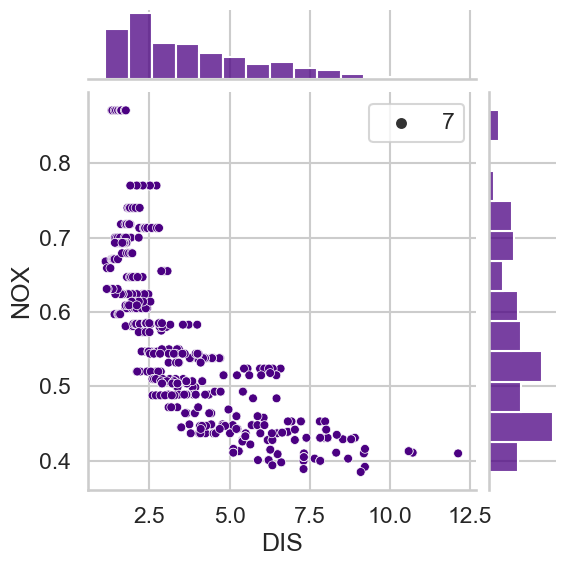

In [72]:
# Seaborn builds on top of matplotlib - like matplot on steriods
sns.set()
# set is used to reset the styling to default
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=housing_data['DIS'], y=housing_data['NOX'], size=7, color='indigo')
plt.show()

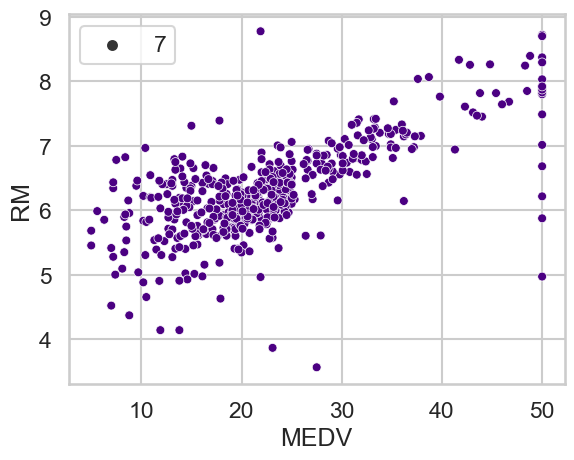

In [75]:
# Challenge: create a scatter plot between the house prices and the number of rooms (RM)
# Seaborn builds on top of matplotlib - like matplot on steriods
sns.set()
# set is used to reset the styling to default
sns.set_context('talk')
sns.set_style('whitegrid')
sns.scatterplot(x=housing_data['MEDV'], y=housing_data['RM'], size=7, color='indigo')
plt.show()

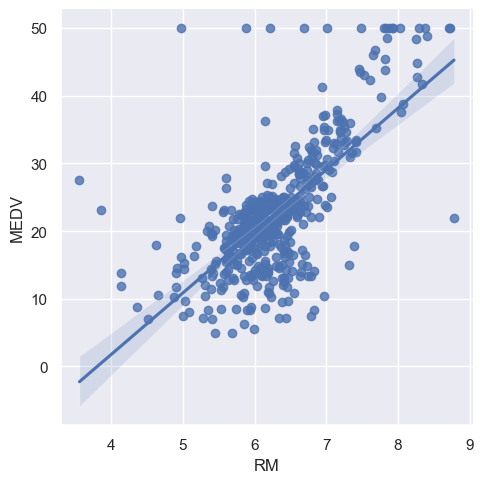

In [86]:
# Challenge: create a regression plot between the house prices and the number of rooms (RM)
# Seaborn builds on top of matplotlib - like matplot on steriods
# set is used to reset the styling to default
sns.lmplot(x='RM', y='MEDV', data = housing_data)
plt.show()

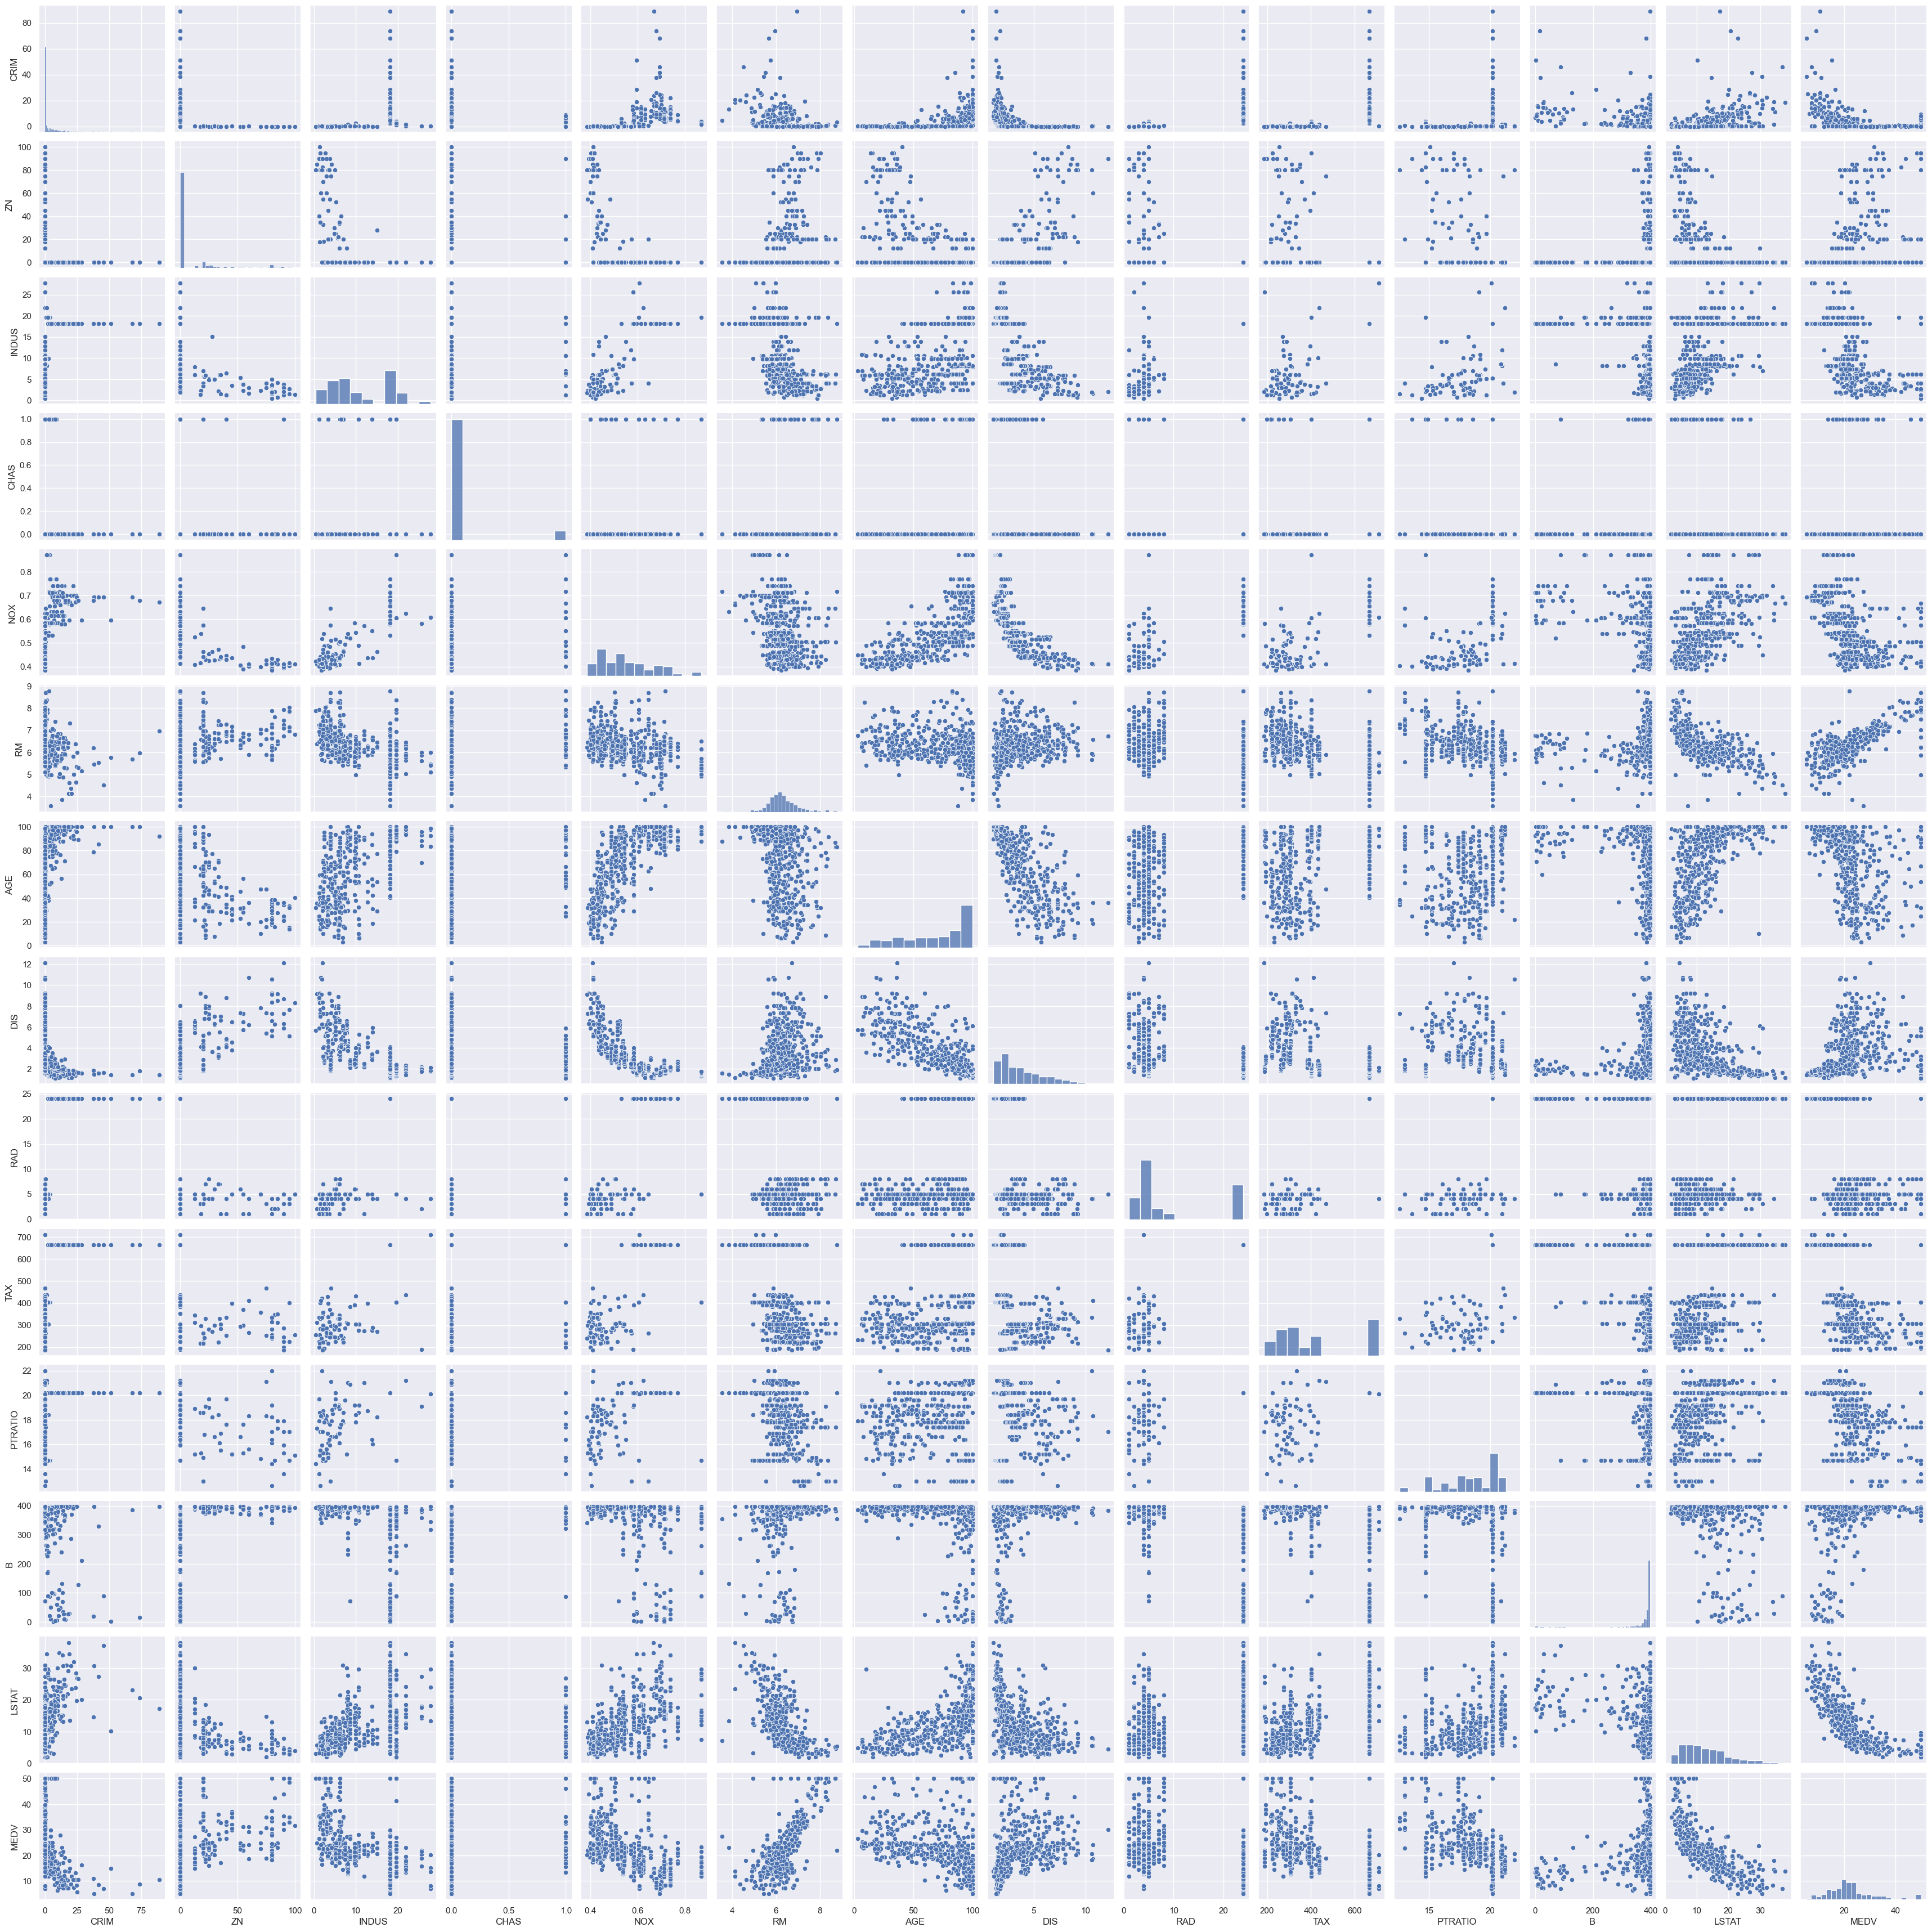

Wall time: 24.8 s


In [88]:
%%time
# Magic plot - showing all the combinations of scatter plots for each variables
sns.pairplot(housing_data)
plt.show()

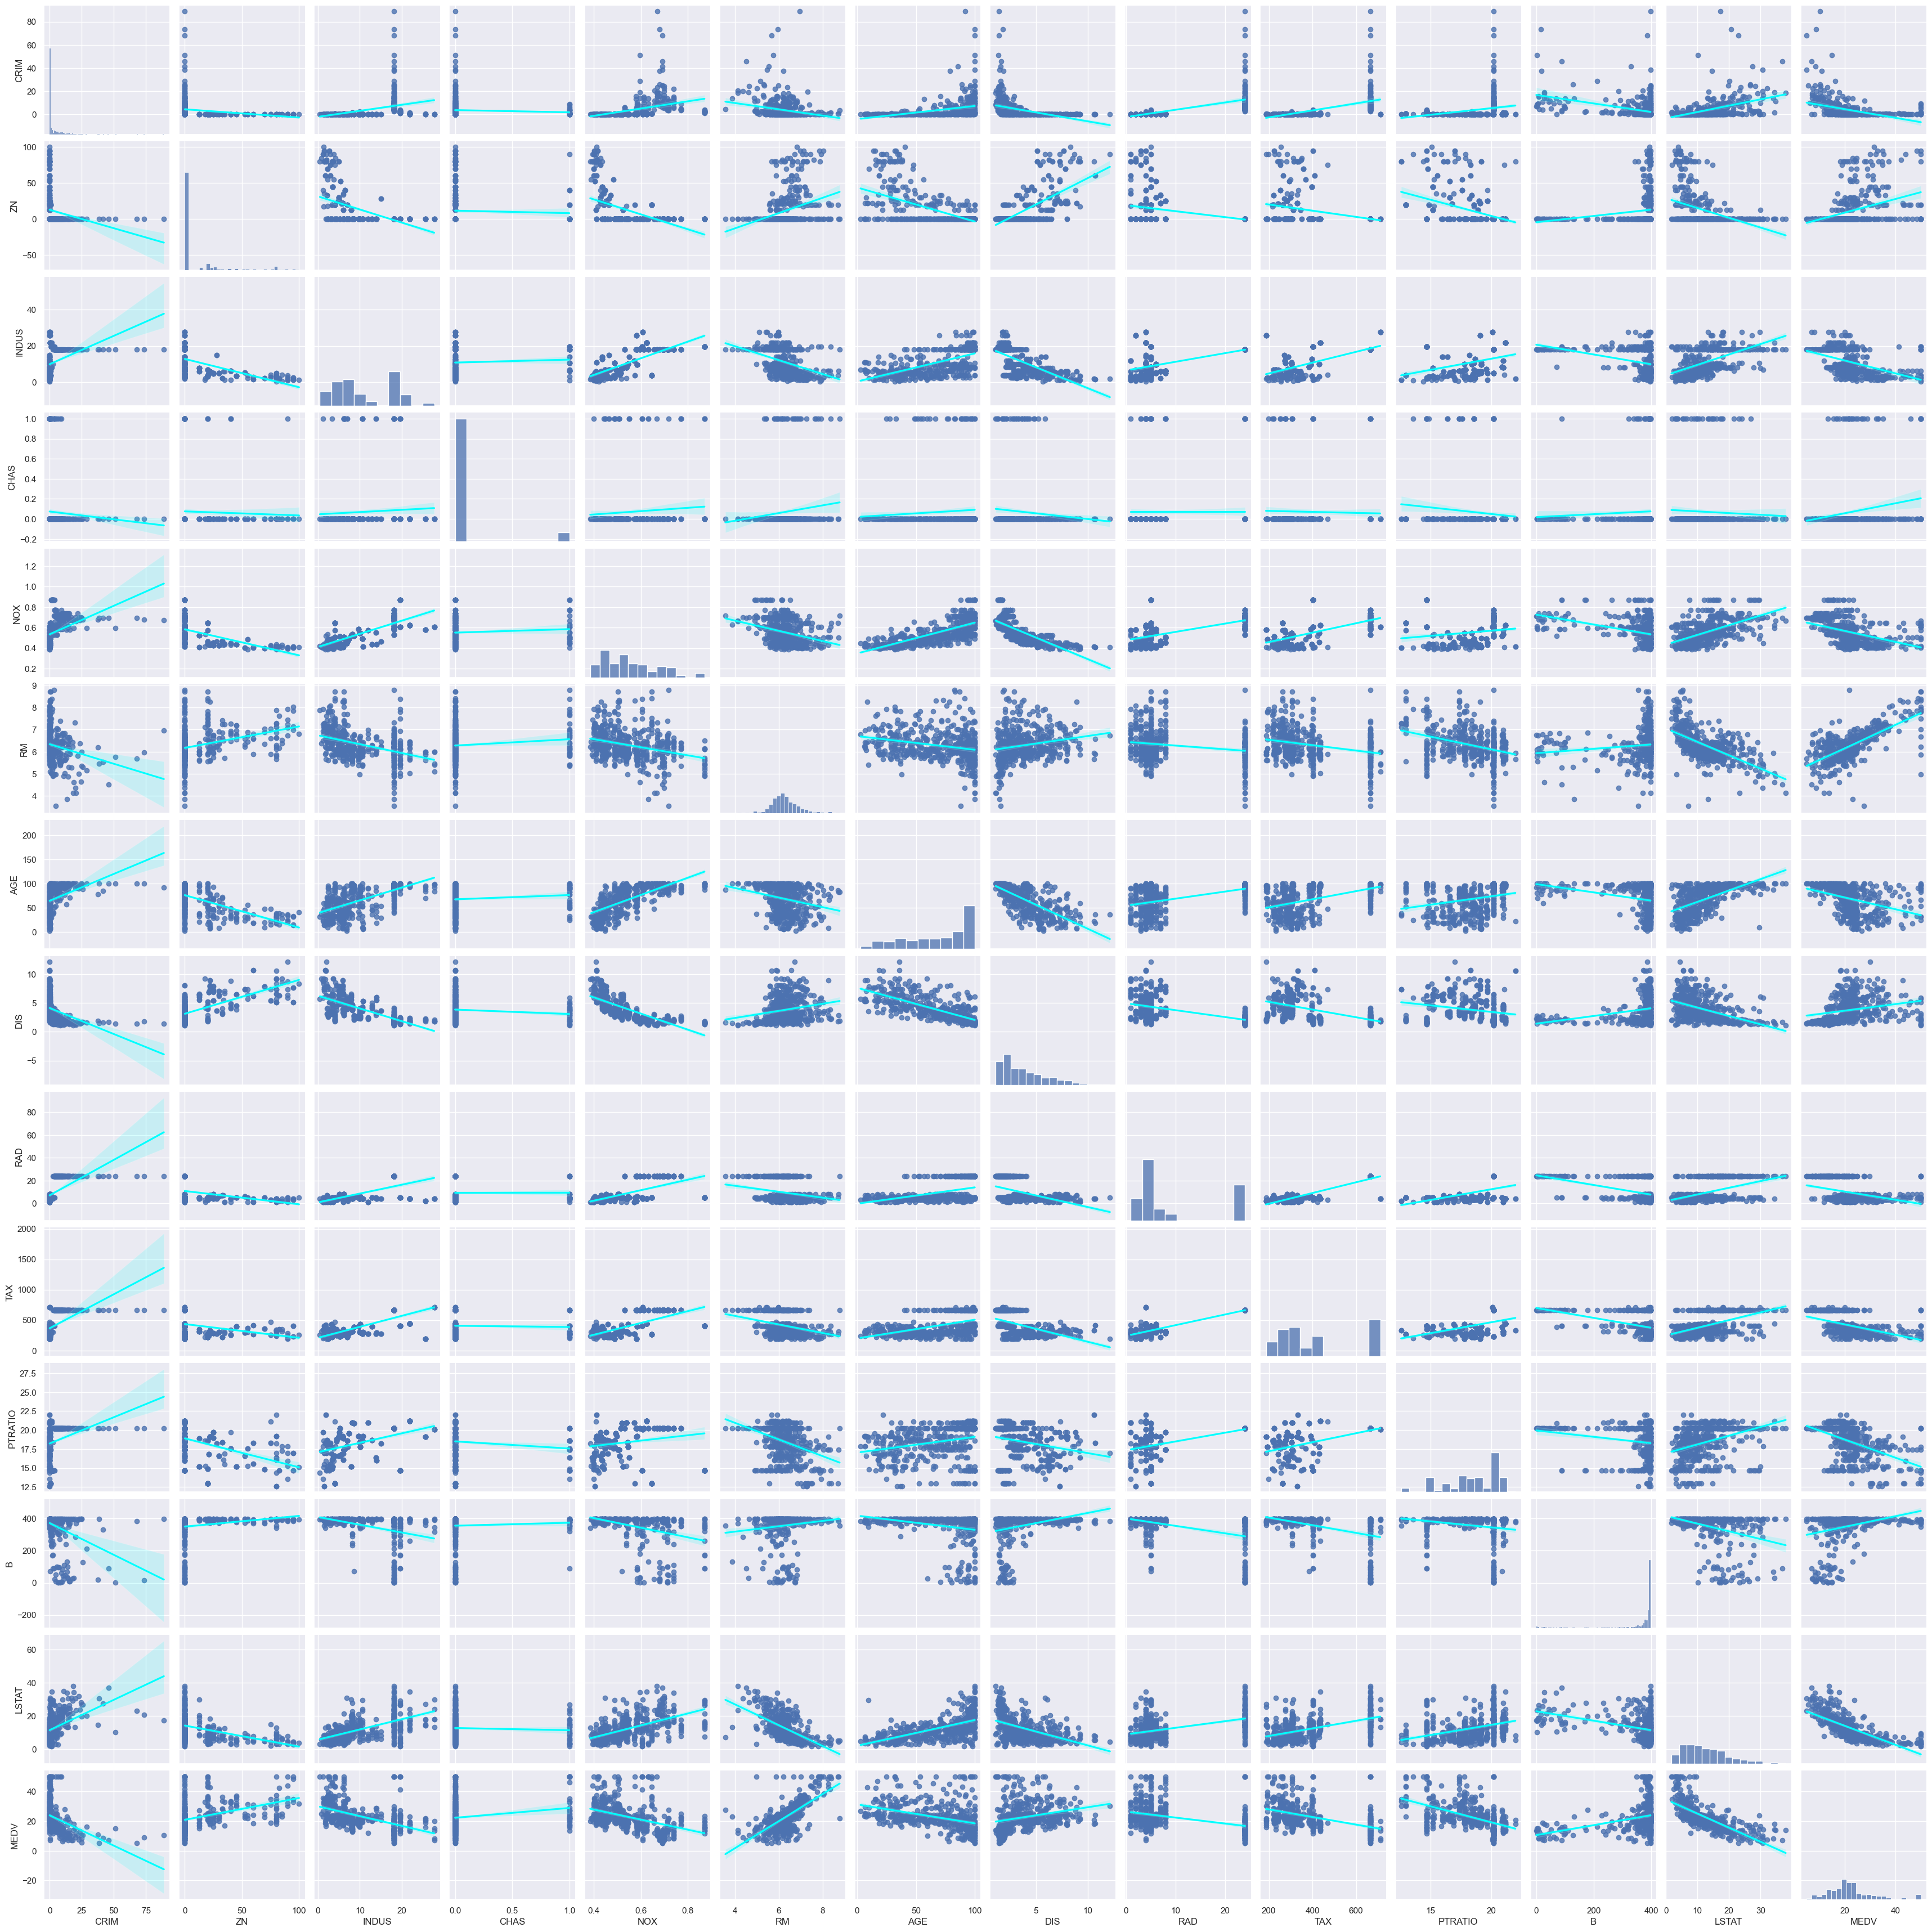

Wall time: 42.1 s


In [90]:
%%time
sns.pairplot(housing_data, kind = 'reg', plot_kws={'line_kws': {'color': 'cyan'}})
# scatter is default
plt.show()